# Step 1: Import Libraries

In [57]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Import XOR Dataset

In [58]:
features = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 1, 1, 0])

# Step 3: Create single hiddle layer model

In [59]:
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.1,
    max_iter=5000,
    random_state=42,
    tol=1e-6
)

# Step 4: Learning Process

In [60]:
mlp.fit(features, target)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,),
              learning_rate_init=0.1, max_iter=5000, random_state=42,
              tol=1e-06)

# Step 5: Predict the XOR wtih trained model

In [61]:
predictions = mlp.predict(features)

In [62]:
print("Predictions:", predictions)

Predictions: [0 1 1 0]


# Step 6: Calculate the accuracy

In [63]:
accuracy = accuracy_score(target, predictions)

In [64]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


# Step 7: Show the XOR Separable Chart

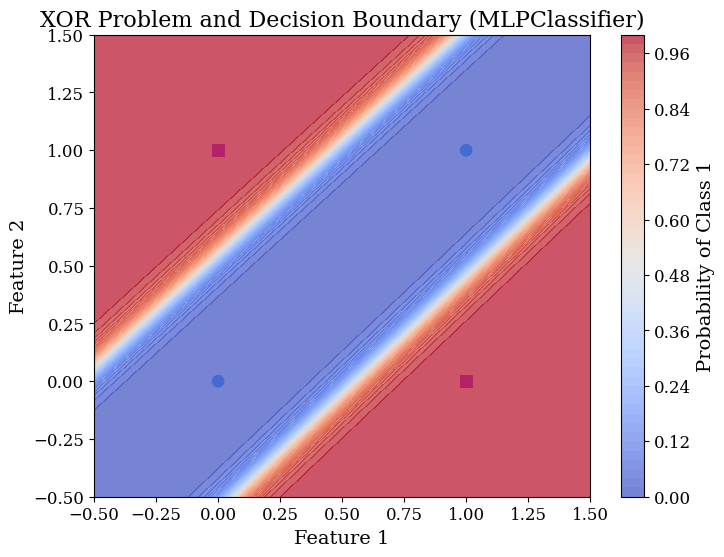

In [65]:
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

probs = mlp.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.rcParams.update({
    "font.family": "DejaVu Serif",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features[:, 0], y=features[:, 1],
    hue=target, style=target,
    markers=["o", "s"], palette="cool", s=100, legend=False
)
plt.contourf(xx, yy, probs, levels=50, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Probability of Class 1")
plt.title("XOR Problem and Decision Boundary (MLPClassifier)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()